In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. 
The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
Signal Line is 9 period EMA of MACD

https://www.investopedia.com/terms/m/macd.asp


A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.

https://www.investopedia.com/terms/s/stochasticoscillator.asp

In [4]:
data = pd.read_csv("data/NFLX.csv", index_col=0, parse_dates=True)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-11,564.440002,565.929993,554.219971,557.590027,557.590027,2730600
2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2197100
2021-02-16,557.289978,563.630005,552.729980,557.280029,557.280029,2624100
2021-02-17,550.989990,555.250000,543.030029,551.340027,551.340027,2069600
2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200


In [13]:
#Provide exponentially weighted (EW) calculations.
#Exactly one parameter: com, span, halflife, or alpha must be provided.
exp12 = data['Close'].ewm(span=12, adjust=False).mean()

In [14]:
exp12

Date
2021-02-11    557.590027
2021-02-12    557.425411
2021-02-16    557.403044
2021-02-17    556.470272
2021-02-18    555.200995
                 ...    
2022-02-07    425.085943
2022-02-08    421.769644
2022-02-09    420.403547
2022-02-10    418.229154
2022-02-11    415.196974
Name: Close, Length: 254, dtype: float64

In [15]:
exp26 = data['Close'].ewm(span=26, adjust=False).mean()

In [16]:
exp26

Date
2021-02-11    557.590027
2021-02-12    557.510767
2021-02-16    557.493676
2021-02-17    557.037850
2021-02-18    556.384673
                 ...    
2022-02-07    468.369995
2022-02-08    463.567032
2022-02-09    459.813179
2022-02-10    455.847017
2022-02-11    451.600571
Name: Close, Length: 254, dtype: float64

In [19]:
data['MACD'] = exp12 - exp26
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [21]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900,-43.284052,-46.258626
2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500,-41.797389,-45.366378
2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200,-39.409632,-44.175029
2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8445400,-37.617864,-42.863596
2022-02-11,405.329987,411.610291,395.600098,398.519989,398.519989,2774538,-36.403596,-41.571596


<IPython.core.display.Javascript object>


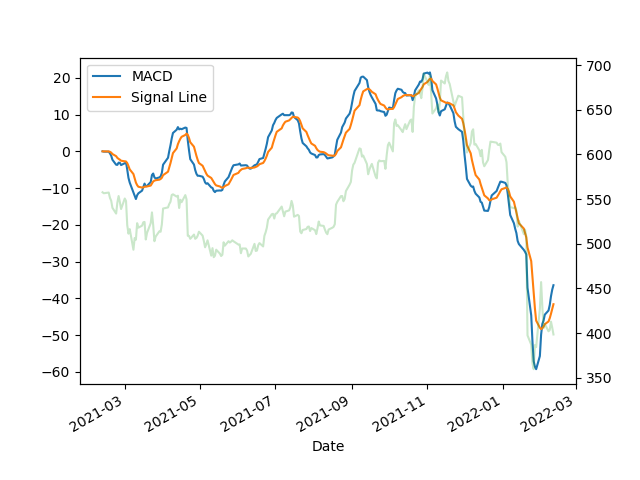

<AxesSubplot:>

In [23]:
fig, ax = plt.subplots()
data[['MACD', 'Signal Line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

When the blue line (MACD) dips below the orange line (Signal Line) it is a sell
When the MACD moves above the Signal line it is a buy or keep
Price is included for reference

Stochastic Oscillator

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.

https://www.investopedia.com/terms/s/stochasticoscillator.asp

14 day high

14 day low

%K = (Last close - 14low)*100 / (14high-14low)

%D = Simple Moving Avg (SMA) of %K (3 days)

In [27]:
high14 = data['High'].rolling(14).max()

In [28]:
low14 = data['Low'].rolling(14).min()

In [36]:
data['%K'] = (data['Close'] - low14)*100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [37]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,%K,%D
Date,,,,,,,,,,
2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900,-43.284052,-46.258626,28.907414,30.462447
2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500,-41.797389,-45.366378,29.723713,30.715078
2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200,-39.409632,-44.175029,57.400498,38.677208
2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8445400,-37.617864,-42.863596,51.214715,46.112975
2022-02-11,405.329987,411.610291,395.600098,398.519989,398.519989,2774538,-36.403596,-41.571596,41.134879,49.916697


<IPython.core.display.Javascript object>


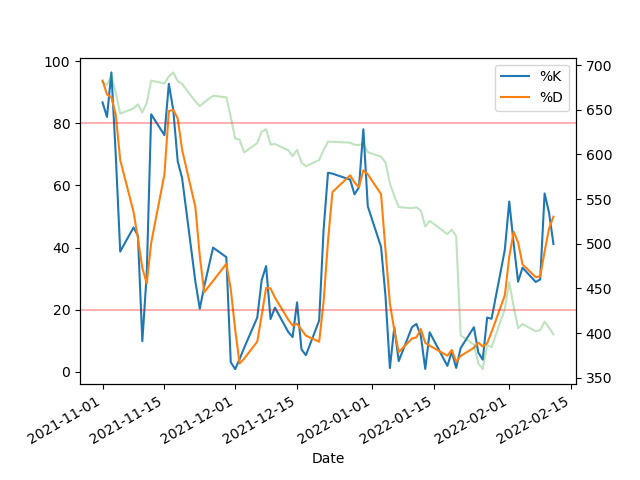

<AxesSubplot:>

In [43]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2021-11-01':].plot(ax=ax, alpha=0.3, secondary_y=True)

Green Line is closing price
When the lines are above the 80% line, it may be overbought
When the %K (blue) crosses under the %D (orange) it is sell
When the %K (blue) crosses over the %D (orange) it is buy/hold